# Import Library

In [1]:
import pandas as pd
import numpy as np  
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# methods

In [2]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

# Use GPU

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')

# Data read

In [4]:
train_x = np.load('data/train_x.npy')
test_x = np.load('data/test_x.npy')
val_x = np.load('data/valid_x.npy')
train_y = np.load('data/train_y.npy')
test_y = np.load('data/test_y.npy')
val_y = np.load('data/valid_y.npy')

# Image Normalization

In [5]:
train_x = image_normalization(train_x)
test_x = image_normalization(train_x)
val_x = image_normalization(train_x)

In [6]:
y_train_encoded = to_categorical(train_y, num_classes=4)
y_val_encoded = to_categorical(val_y, num_classes=4)
y_test_encoded = to_categorical(test_y, num_classes=4)

In [7]:
X_train = train_x.transpose((0, 2, 3, 1))
X_test = test_x.transpose((0, 2, 3, 1))
X_val = val_x.transpose((0, 2, 3, 1))

# Plot Random Image

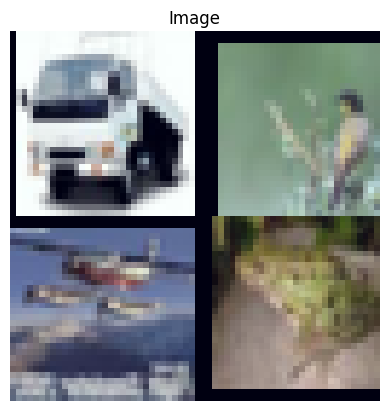

3


In [8]:
Random_Num = np.random.randint(0,(len(train_x)-1))
img = train_x[Random_Num]
img = img.transpose(1, 2, 0) 

plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()
print(train_y[Random_Num])

In [9]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(4, activation='softmax'))  # Assuming 10 classes for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


'''# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
data_gen.fit(train_images)
'''

base_model = ResNet50(weights=None, include_top=False, input_shape=(64, 64, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(4, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
'''
history = model.fit(data_gen.flow(X_train, y_train_encoded, batch_size=32),
                    epochs=10,
                    validation_data=(test_images, test_labels))

'''

'\nhistory = model.fit(data_gen.flow(X_train, y_train_encoded, batch_size=32),\n                    epochs=10,\n                    validation_data=(test_images, test_labels))\n\n'

In [11]:
history = model.fit(data_gen.flow(X_train, y_train_encoded, batch_size=32), epochs=10, validation_data=(X_val, y_val_encoded))

NameError: name 'data_gen' is not defined

In [12]:
history = model.fit(X_train, y_train_encoded, batch_size=32,epochs=10,validation_data =( X_val, y_val_encoded))

Epoch 1/10
1407/1407 [==============================] - ETA: 0s - loss: 1.5115 - accuracy: 0.2939

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc * 100:.2f}%')
